##    ------| Pistol Shrimp Portfolio Analysis |------
           \ Ramatu, Emily, Evan, Alice, Melody /

In [108]:
# Import Required Packages

import numpy as np
import pandas.testing
import pandas_datareader as web
from datetime import datetime
import scipy.optimize as sco
import matplotlib.pyplot as plt
import seaborn
import sys
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as web
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
print("python version {}".format(sys.version))

python version 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]


In [30]:
# Monte Carlo Simulation & Random Walk Theory

import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
from pandas_datareader import data
from matplotlib import style
style.use('seaborn-bright')

In [31]:
# set up start data & the symbols for the stocks

start = datetime(2016, 1, 3)
symbols_list = [ 'EA', 'ENPH', 'EL']
symbols_list_snp = [ 'EA', 'ENPH', 'EL', 'IVV']
# Enphase Energy (Solar tech), Estee Lauder (cosmetics), EA (video game), IVV 
# tracks the entire S&P

In [32]:
# Let's set up an empty array to store the prices that we are pulling from Yahooo Finance

symbols=[]

for ticker in symbols_list: 
    r = web.DataReader(ticker, 'yahoo', start)

# add a symbol column
    r['Symbol'] = ticker 
    symbols.append(r)
    
# Let's load them into the dataframe

df = pd.concat(symbols)
df = df.reset_index()
df = df[['Date', 'Adj Close', 'Symbol']]
df.tail()

Date   Adj Close Symbol
3214 2020-04-01  153.380005     EL
3215 2020-04-02  149.210007     EL
3216 2020-04-03  154.080002     EL
3217 2020-04-06  160.500000     EL
3218 2020-04-07  163.884995     EL

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3210 entries, 0 to 3209
Data columns (total 3 columns):
Date         3210 non-null datetime64[ns]
Adj Close    3210 non-null float64
Symbol       3210 non-null object
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 75.3+ KB


In [33]:
df_portfolio = df.set_index('Date') 
table = df_portfolio.pivot(columns='Symbol') # By specifying col[1] in below list comprehension 

# You can select the stock names under multi-level column 
table.columns = [col[1] for col in table.columns] 
table.head()

EA         EL  ENPH
Date                                  
2016-01-04  66.099998  82.825233  3.49
2016-01-05  64.940002  83.584999  3.35
2016-01-06  63.680000  80.811806  3.16
2016-01-07  62.459999  79.140320  3.00
2016-01-08  63.130001  78.655945  2.99

Text(0.5, 1.0, 'Stock Price: 4 years for Pistol Shrimp Portfolio')

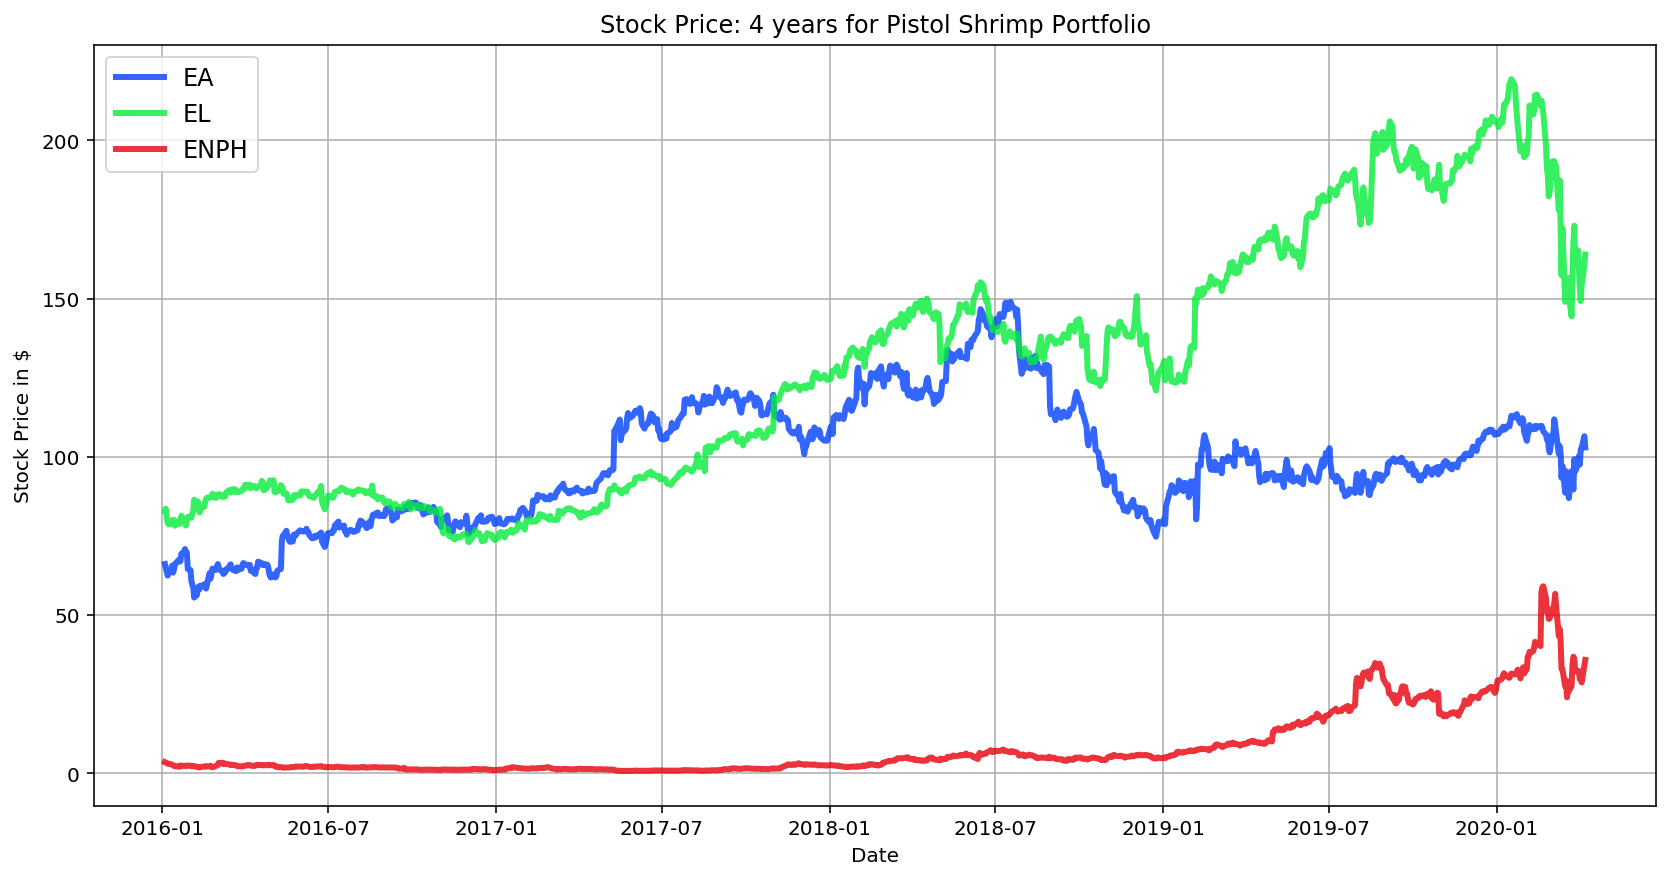

In [34]:
plt.figure(figsize=(14, 7))
for c in table.columns.values:
        plt.plot(table.index, table[c], lw=3, alpha=0.8,label=c) 
plt.legend(loc='upper left', fontsize=12) 
plt.grid()
plt.ylabel('Stock Price in $')
plt.xlabel("Date")
plt.title("Stock Price: 4 years for Pistol Shrimp Portfolio")

Text(0.5, 1.0, 'Stock Price: 4 years for Pistol Shrimp Portfolio vs S&P 500 ETF')

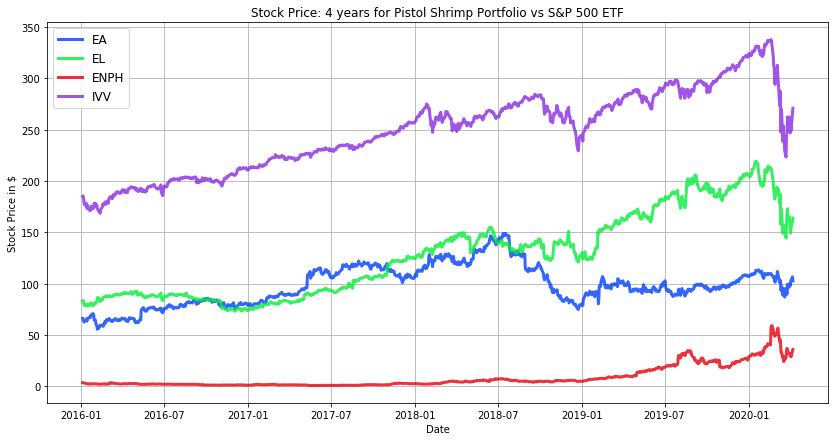

In [15]:
# plot our portfolio, with IVV included, so we can see its performance relative to the SnP

symbols_snp=[]

for ticker in symbols_list_snp: 
    r = web.DataReader(ticker, 'yahoo', start)

# add a symbol column
    r['Symbol'] = ticker 
    symbols_snp.append(r)
    
# Let's load them into the dataframe

df_snp = pd.concat(symbols_snp)
df_snp = df_snp.reset_index()
df_snp = df_snp[['Date', 'Adj Close', 'Symbol']]

df_portfolio_snp = df_snp.set_index('Date') 
table_snp = df_portfolio_snp.pivot(columns='Symbol') # By specifying col[1] in below list comprehension 

# You can select the stock names under multi-level column 
table_snp.columns = [col[1] for col in table_snp.columns] 
table_snp.head()

plt.figure(figsize=(14, 7))
for c in table_snp.columns.values:
        plt.plot(table_snp.index, table_snp[c], lw=3, alpha=0.8,label=c) 
plt.legend(loc='upper left', fontsize=12) 
plt.grid()
plt.ylabel('Stock Price in $')
plt.xlabel("Date")
plt.title("Stock Price: 4 years for Pistol Shrimp Portfolio vs S&P 500 ETF")

In [35]:
# Import libraries
import pandas as pd
from finquant.portfolio import build_portfolio
import quandl
np.random.seed(777)
%config InlineBackend.figure_format = 'retina'

Text(0.5, 1.0, 'Pistol Shrimp Daily Returns')

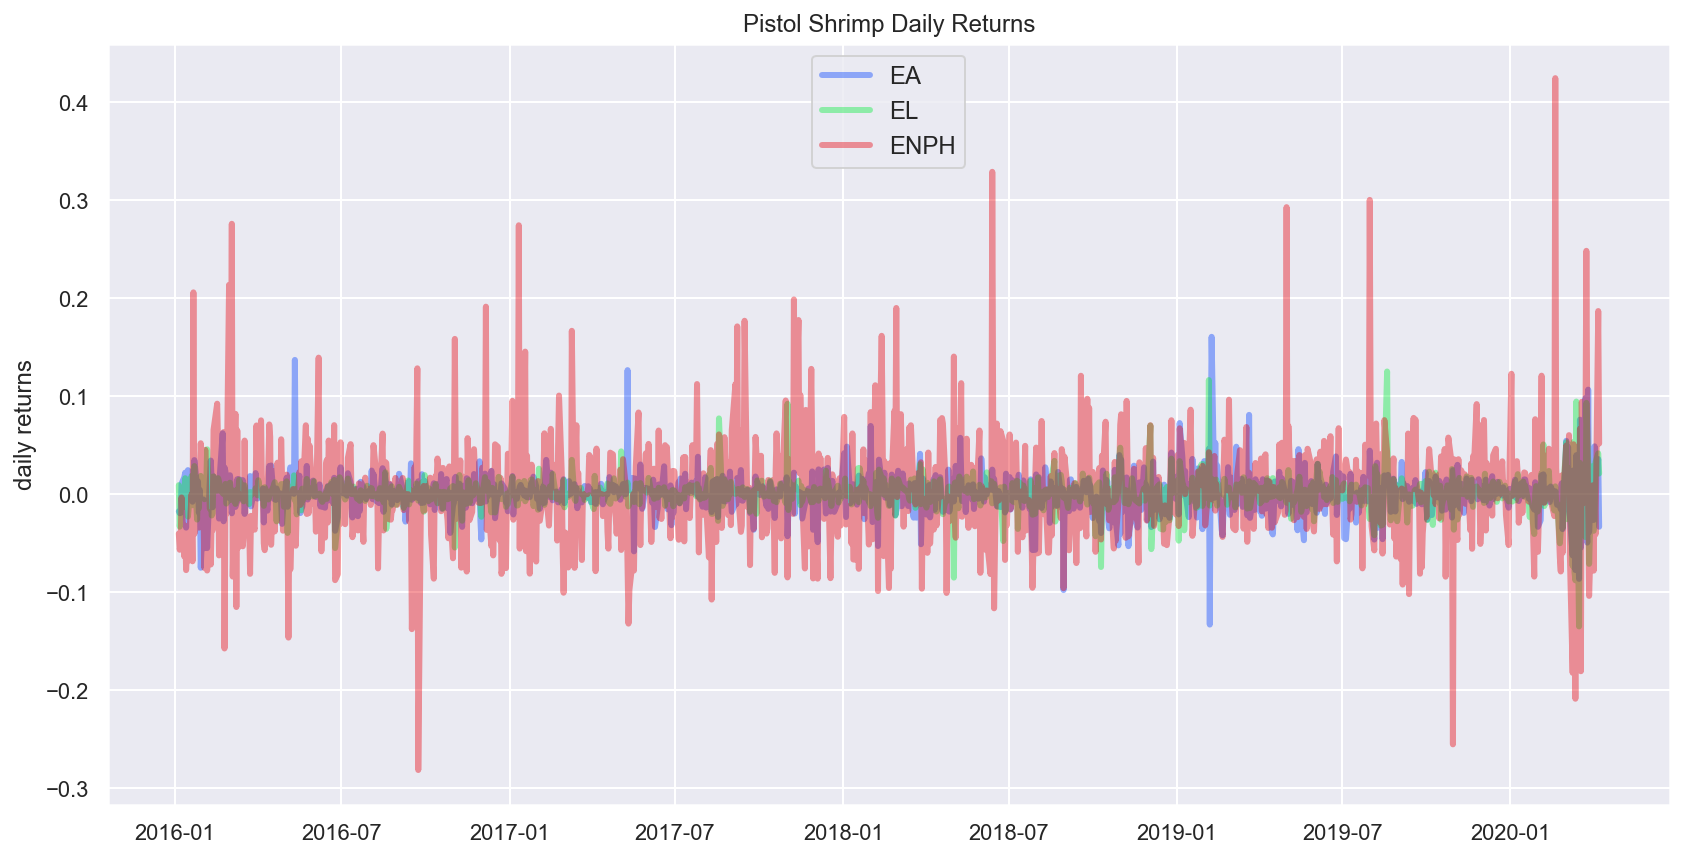

In [109]:
# daily return  - percentage change in adj closing price relative to day before
plt.style.use('seaborn-bright')
returns = table.pct_change()
plt.figure(figsize=(14, 7))
for c in returns.columns.values:
    plt.plot(returns.index, returns[c], lw=3, alpha=0.4,label=c)
plt.legend(loc='upper center', fontsize=12)
plt.ylabel('daily returns')
plt.title("Pistol Shrimp Daily Returns")

# Individual Performance -- Bollinger Bands

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as web

# get our data from Yahoo
def get_adj_close(ticker, start, end):
    start = start
    end = end
    info = web.DataReader(ticker, data_source = 'yahoo', start = start, end = end)['Adj Close']
    return pd.DataFrame(info)

EA = get_adj_close('EA', '1/2/2016', '4/8/2020') #electronic arts
IVV = get_adj_close('IVV', '1/2/2016', '4/8/2020') # S&P 500 ETF - show relative performance of stock mkt
EL = get_adj_close('EL', '1/2/2016', '4/8/2020') # Estee Lauer
ENPH = get_adj_close('ENPH', '1/2/2016', '4/8/2020') # Enphase

In [69]:
# Calculate 20 day MA
for item in (EL, EA, ENPH, IVV):
    item['20 Day MA'] = item['Adj Close'].rolling(window = 20).mean()
    
    # set .std(ddof=0) for population std instead of sample
    item['20 Day STD'] = item['Adj Close'].rolling(window = 20).std()
    
    item['Upper Band']= item['20 Day MA'] + (item['20 Day STD'] * 2)
    item['Lower Band']= item['20 Day MA'] - (item['20 Day STD'] * 2)

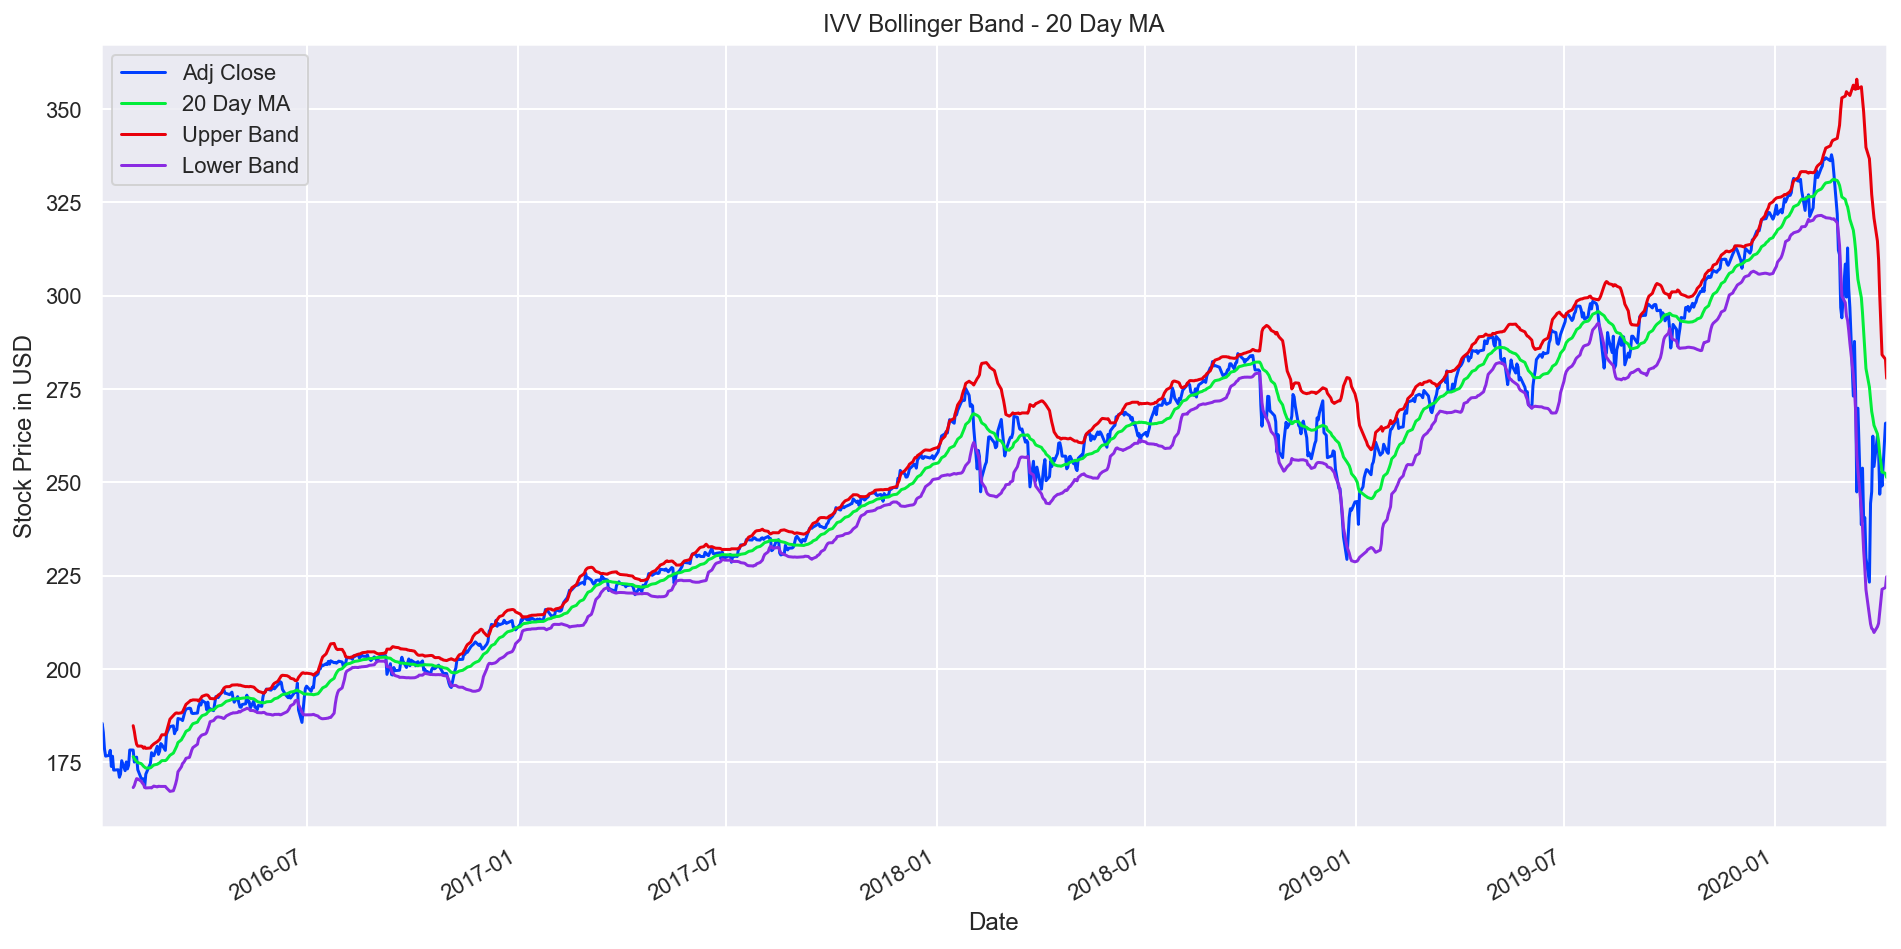

In [75]:
# Plot IVV

IVV[['Adj Close', '20 Day MA', 'Upper Band', 'Lower Band']].plot(figsize = (16, 8))
plt.title("IVV Bollinger Band - 20 Day MA")
plt.legend(loc = 'upper left')
plt.ylabel('Stock Price in USD')
plt.show()

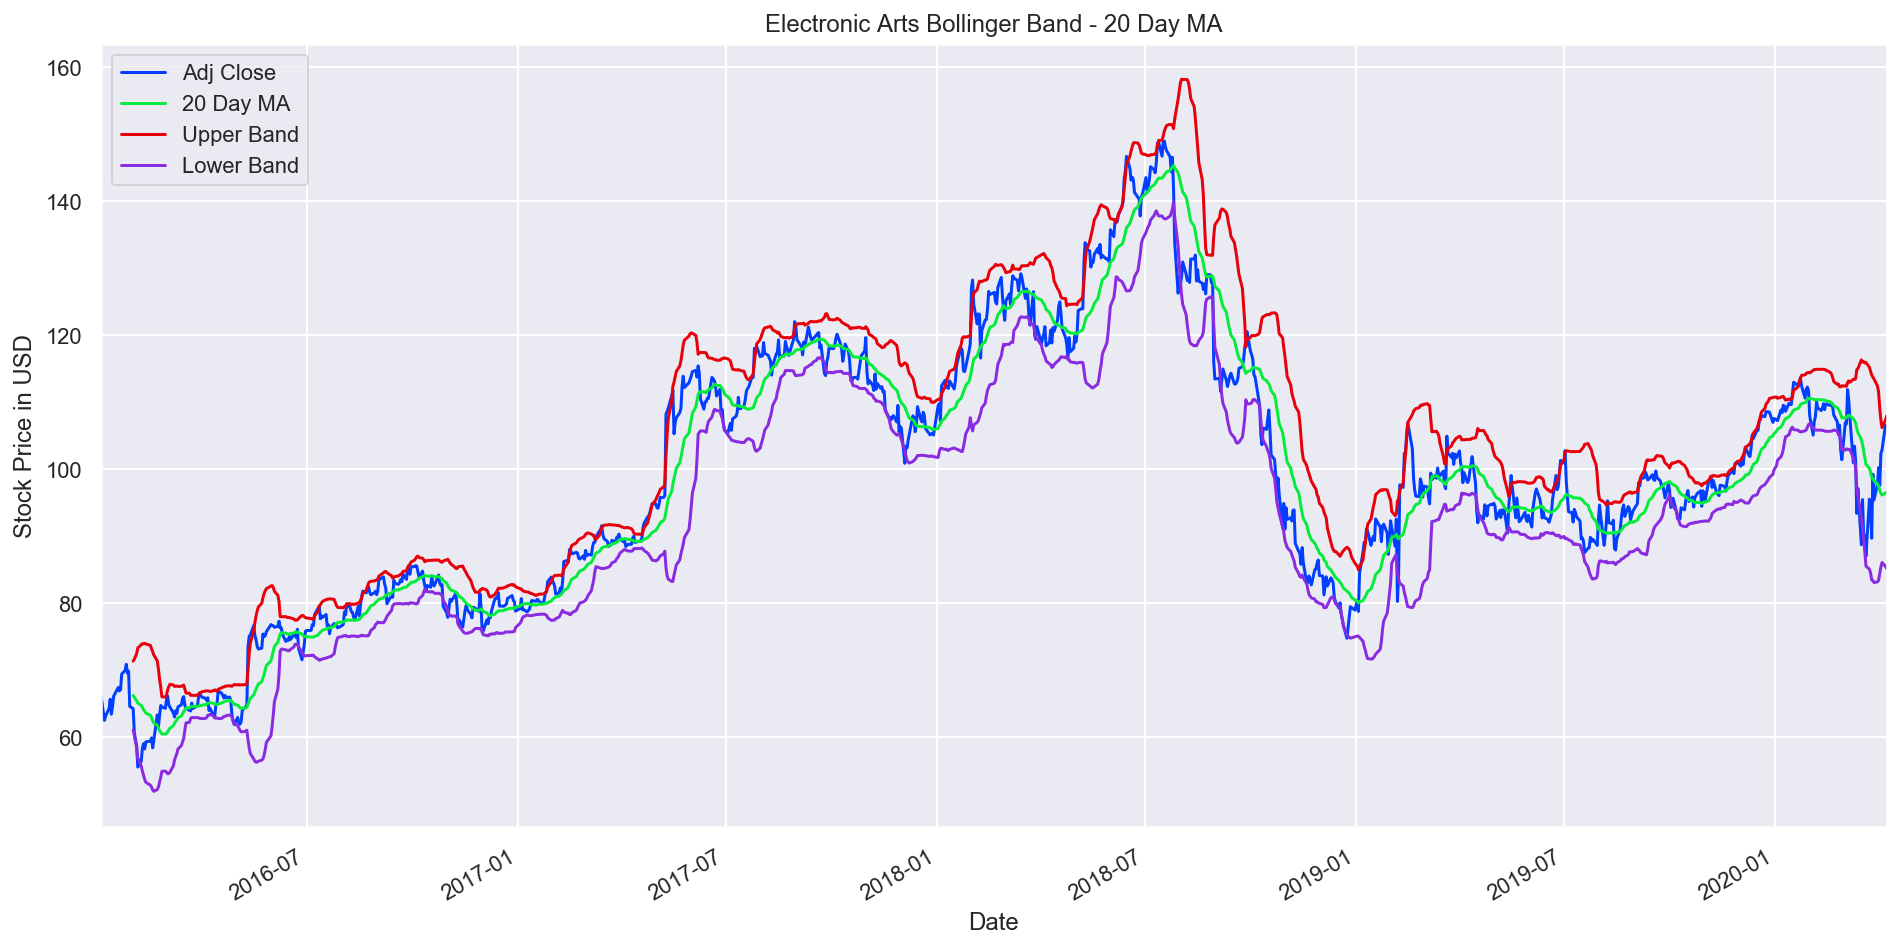

In [70]:
# Electronic Arts

EA[['Adj Close', '20 Day MA', 'Upper Band', 'Lower Band']].plot(figsize = (16,8))
plt.title("Electronic Arts Bollinger Band - 20 Day MA")
plt.legend(loc = 'upper left')
plt.ylabel('Stock Price in USD')
plt.show()

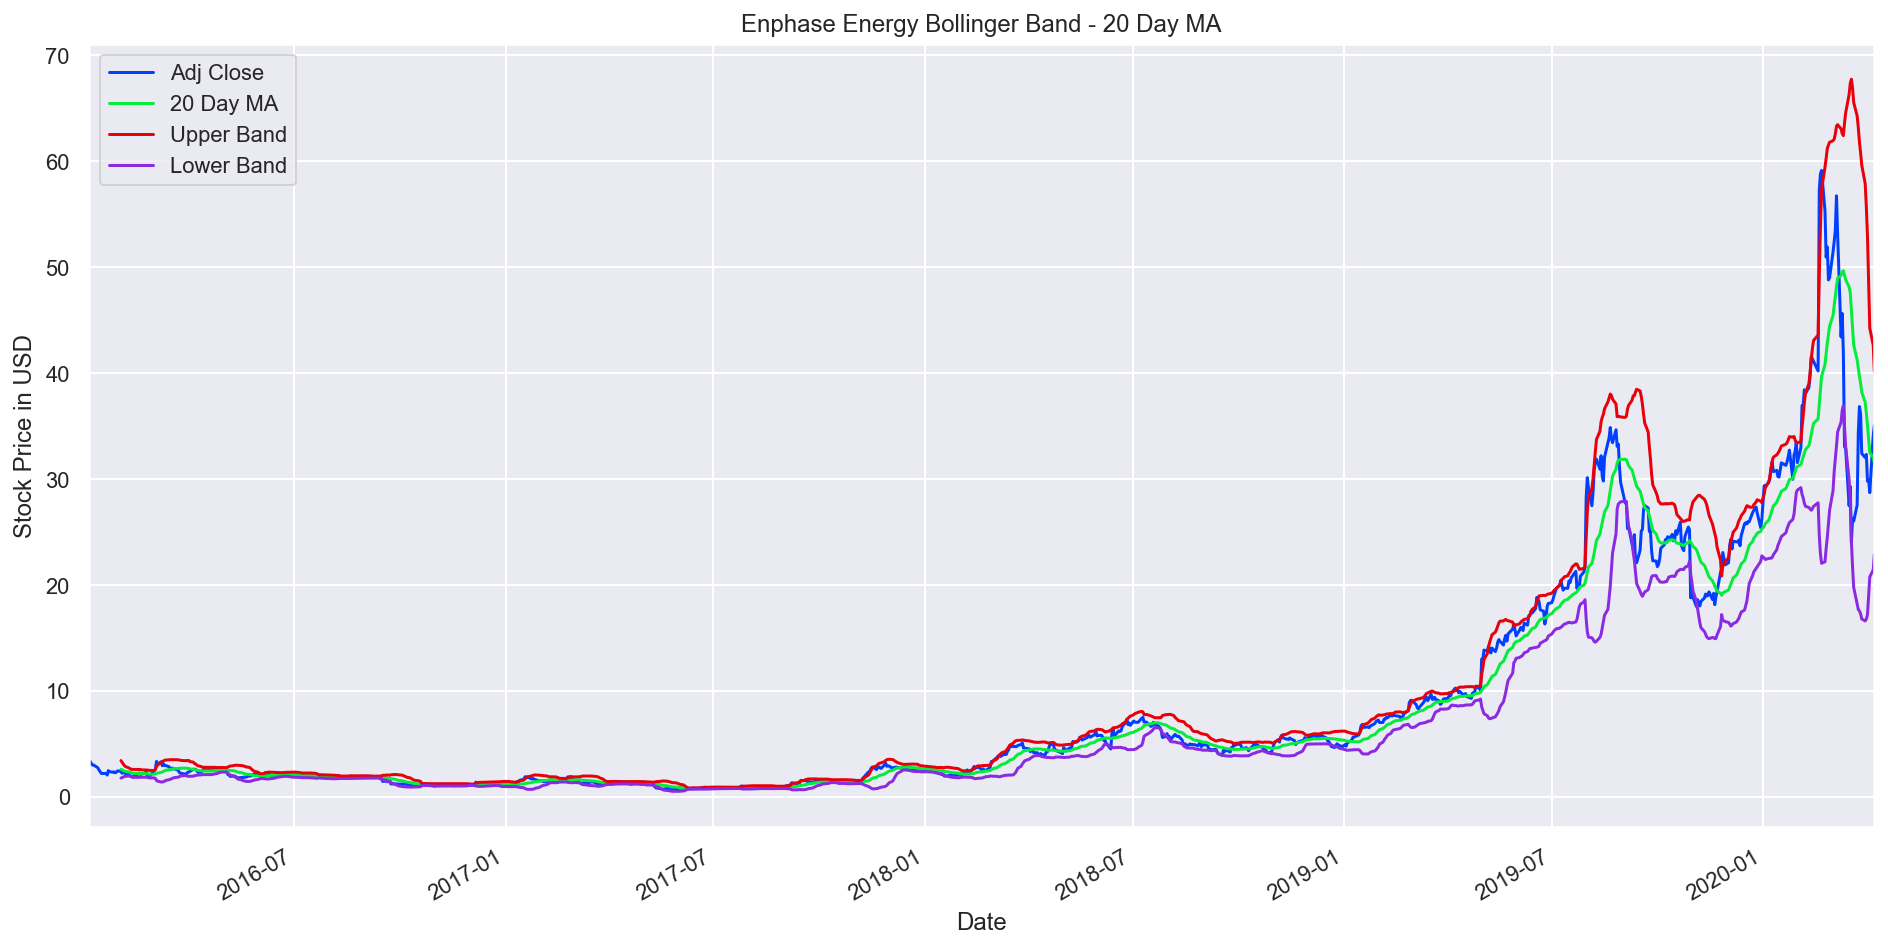

In [72]:
# Plot Enphase

ENPH[['Adj Close', '20 Day MA', 'Upper Band', 'Lower Band']].plot(figsize = (16, 8))
plt.title("Enphase Energy Bollinger Band - 20 Day MA")
plt.legend(loc = 'upper left')
plt.ylabel('Stock Price in USD')
plt.show()

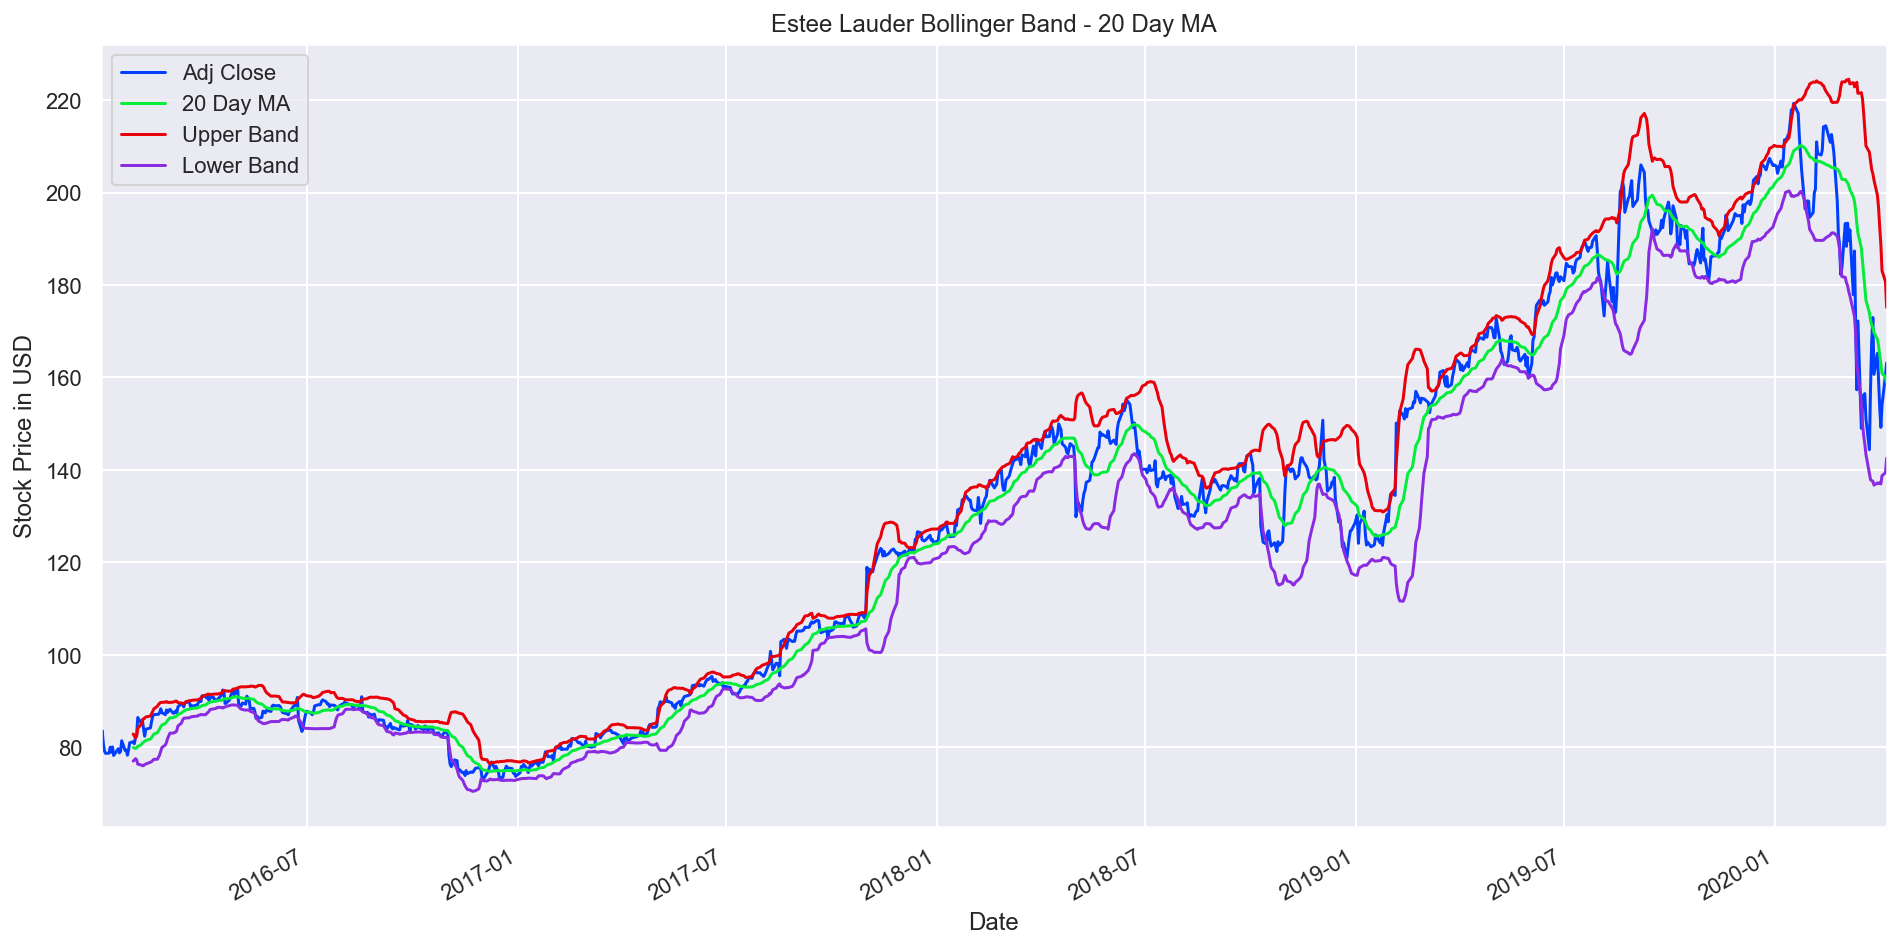

In [74]:
# Estee Lauder

EL[['Adj Close', '20 Day MA', 'Upper Band', 'Lower Band']].plot(figsize = (16, 8))
plt.title("Estee Lauder Bollinger Band - 20 Day MA")
plt.legend(loc = 'upper left')
plt.ylabel('Stock Price in USD')
plt.show()

In [37]:
def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights ) *252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return std, returns
  
def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    results = np.zeros((3,num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.random(3)
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weights_record

In [90]:
# Sharpe Ratio - the relationship between risk and return. How much risk is involved in getting the return ?
returns = table.pct_change()
mean_returns = returns.mean()
cov_matrix = returns.cov()
num_portfolios = 25000
risk_free_rate = 0.0152 # risk-free rate

In [91]:
def display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, weights = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=table.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=table.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Annualised Return:", round(rp,2))
    print ("Annualised Volatility:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)
    print ("Minimum Volatility Portfolio Allocation\n")
    print ("Annualised Return:", round(rp_min,2))
    print ("Annualised Volatility:", round(sdp_min,2))
    print ("\n")
    print(min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('Annualised Volatility\n')
    plt.ylabel('Annualised Returns')
    plt.legend(labelspacing=0.8)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.43
Annualised Volatility: 0.36


               EA     EL   ENPH
allocation  13.13  54.23  32.65
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.19
Annualised Volatility: 0.23


               EA     EL  ENPH
allocation  36.85  62.02  1.13


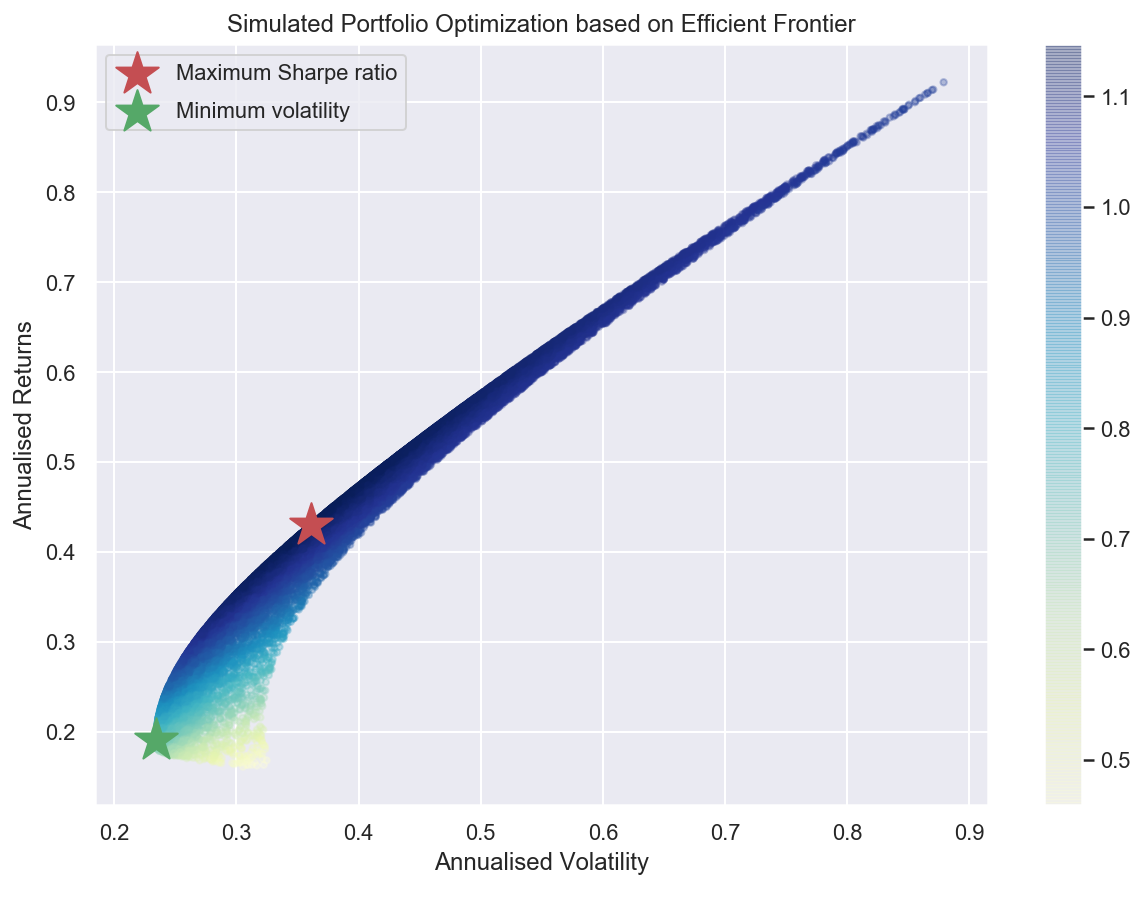

In [92]:
display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)

In [94]:
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x)-1})
import scipy.optimize as sco
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    p_var, p_ret = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_var

def max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix, risk_free_rate)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(neg_sharpe_ratio, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result

In [95]:
def portfolio_volatility(weights, mean_returns, cov_matrix):
    return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[0]

def min_variance(mean_returns, cov_matrix):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))

    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)

    return result

In [96]:
def efficient_return(mean_returns, cov_matrix, target):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)

    def portfolio_return(weights):
        return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[1]

    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return(x) - target},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0,1) for asset in range(num_assets))
    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    return result


def efficient_frontier(mean_returns, cov_matrix, returns_range):
    efficients = []
    for ret in returns_range:
        efficients.append(efficient_return(mean_returns, cov_matrix, ret))
    return efficients

In [97]:
def display_calculated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, _ = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)
    sdp, rp = portfolio_annualised_performance(max_sharpe['x'], mean_returns, cov_matrix)
    max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=table.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T

    min_vol = min_variance(mean_returns, cov_matrix)
    sdp_min, rp_min = portfolio_annualised_performance(min_vol['x'], mean_returns, cov_matrix)
    min_vol_allocation = pd.DataFrame(min_vol.x,index=table.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Annualised Return:", round(rp,2))
    print ("Annualised Volatility:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)
    print ("Minimum Volatility Portfolio Allocation\n")
    print ("Annualised Return:", round(rp_min,2))
    print ("Annualised Volatility:", round(sdp_min,2))
    print ("\n")
    print (min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')

    target = np.linspace(rp_min, 0.32, 50)
    efficient_portfolios = efficient_frontier(mean_returns, cov_matrix, target)
    plt.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', color='black', label='efficient frontier')
    plt.title('Calculated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('Annualised Volatility')
    plt.ylabel('Annualised Returns')
    plt.legend(labelspacing=0.8)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.43
Annualised Volatility: 0.36


               EA     EL   ENPH
allocation  13.43  53.75  32.82
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.19
Annualised Volatility: 0.23


               EA     EL  ENPH
allocation  36.17  62.88  0.95


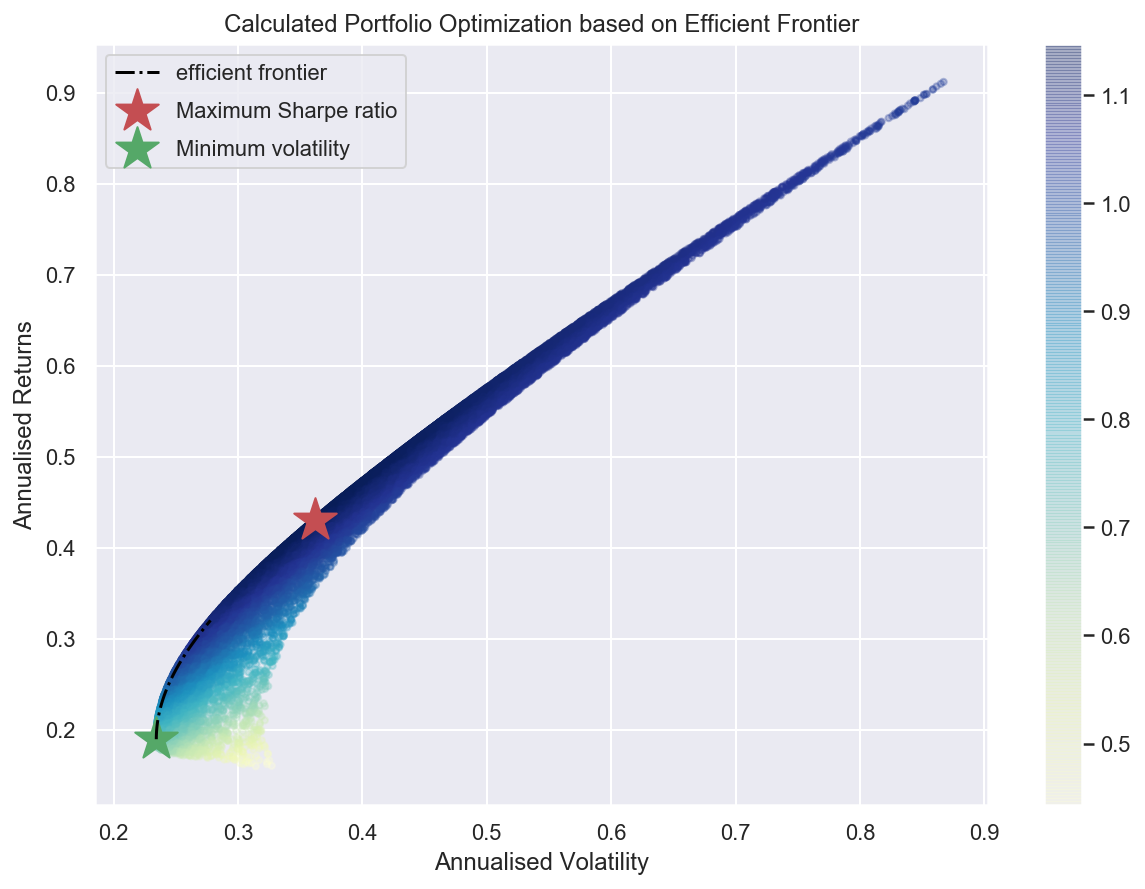

In [98]:
display_calculated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)

In [105]:
def display_ef_with_selected(mean_returns, cov_matrix, risk_free_rate):
    max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)
    sdp, rp = portfolio_annualised_performance(max_sharpe['x'], mean_returns, cov_matrix)
    max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=table.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T

    min_vol = min_variance(mean_returns, cov_matrix)
    sdp_min, rp_min = portfolio_annualised_performance(min_vol['x'], mean_returns, cov_matrix)
    min_vol_allocation = pd.DataFrame(min_vol.x,index=table.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    an_vol = np.std(returns) * np.sqrt(252)
    an_rt = mean_returns * 252
    
    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Annualised Return:", round(rp,2))
    print ("Annualised Volatility:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)
    print ("Minimum Volatility Portfolio Allocation\n")
    print ("Annualised Return:", round(rp_min,2))
    print ("Annualised Volatility:", round(sdp_min,2))
    print ("\n")
    print (min_vol_allocation)
    print ("-"*80)
    print ("Individual Stock Returns and Volatility\n")
    for i, txt in enumerate(table.columns):
        print(txt,":","annuaised return",round(an_rt[i],2),", annualised volatility:",round(an_vol[i],2))
    print ("-"*80)
    
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.scatter(an_vol,an_rt,marker='o',s=200)

    for i, txt in enumerate(table.columns):
        ax.annotate(txt, (an_vol[i],an_rt[i]), xytext=(10,0), textcoords='offset points')
    ax.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    ax.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')

    target = np.linspace(rp_min, 0.34, 50)
    efficient_portfolios = efficient_frontier(mean_returns, cov_matrix, target)
    ax.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', color='black', label='efficient frontier')
    ax.set_title('Portfolio Optimization with Individual Stocks')
    ax.set_xlabel('annualised volatility')
    ax.set_ylabel('annualised returns')
    ax.legend(labelspacing=0.8)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.43
Annualised Volatility: 0.36


               EA     EL   ENPH
allocation  13.43  53.75  32.82
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.19
Annualised Volatility: 0.23


               EA     EL  ENPH
allocation  36.17  62.88  0.95
--------------------------------------------------------------------------------
Individual Stock Returns and Volatility

EA : annuaised return 0.16 , annualised volatility: 0.33
EL : annuaised return 0.2 , annualised volatility: 0.27
ENPH : annuaised return 0.93 , annualised volatility: 0.88
--------------------------------------------------------------------------------


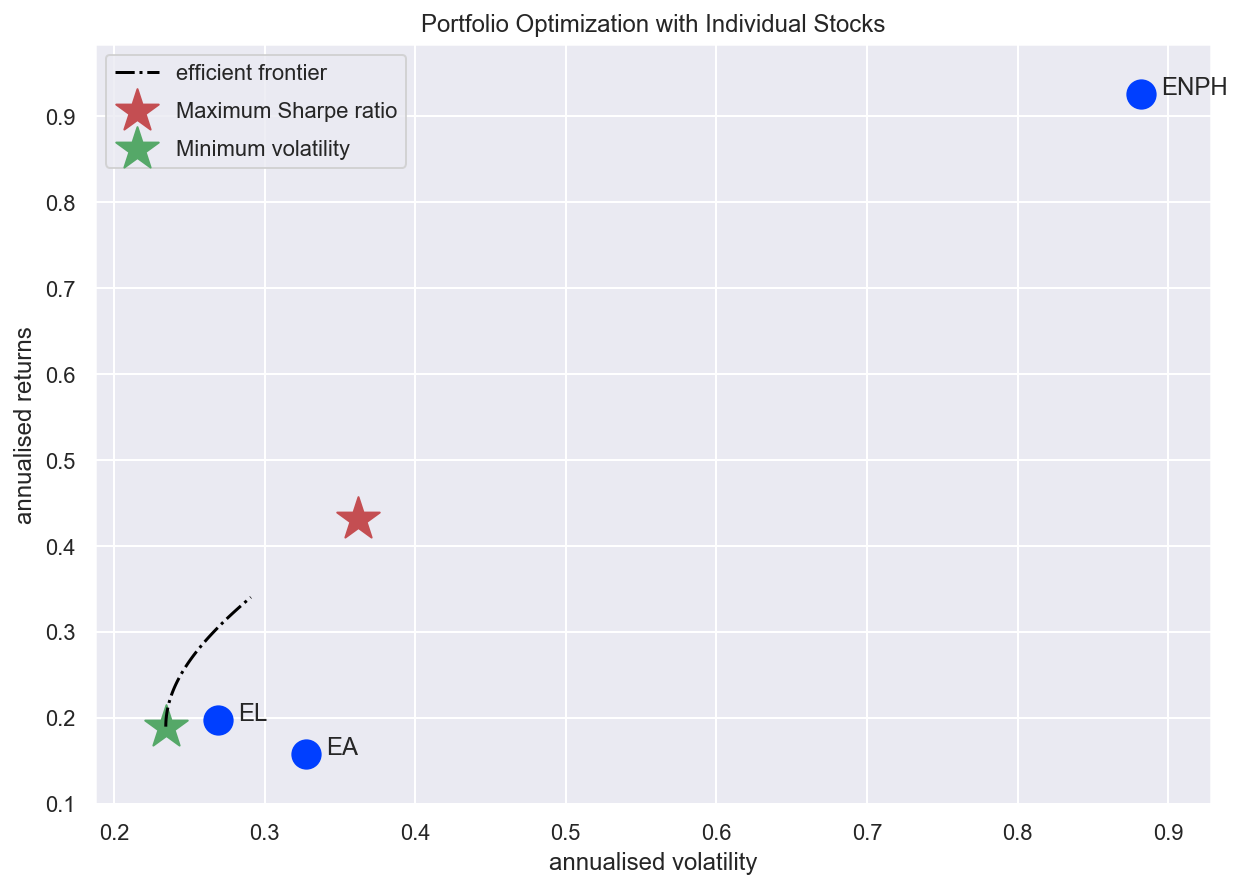

In [101]:
display_ef_with_selected(mean_returns, cov_matrix, risk_free_rate)

In [102]:
cov_matrix

EA        EL      ENPH
EA    0.000426  0.000098  0.000208
EL    0.000098  0.000287  0.000181
ENPH  0.000208  0.000181  0.003090

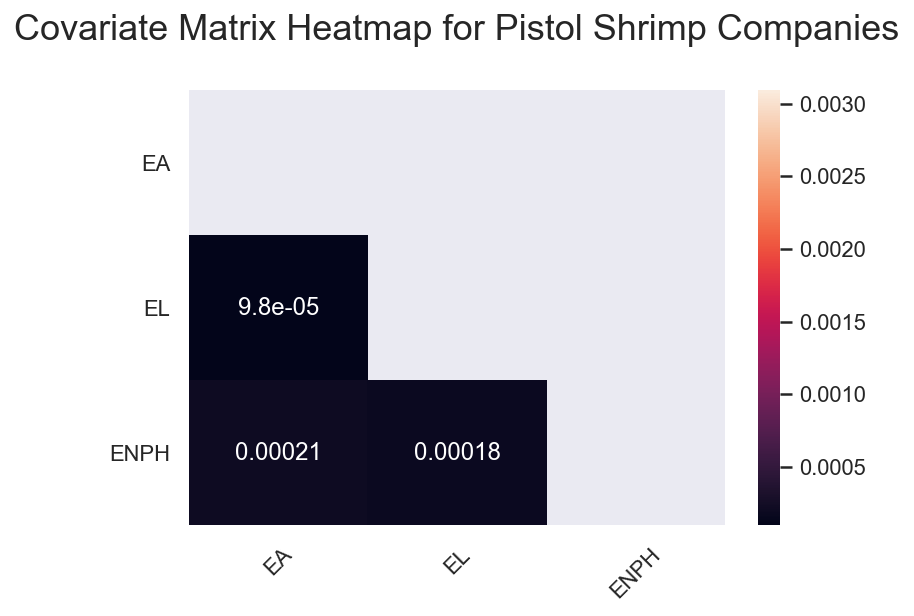

In [103]:
import seaborn as sns
# plot covariate_matrix

# Now Let's put the dataframe into a visual chart
import numpy as np

canvas = np.zeros_like(cov_matrix)
canvas[np.triu_indices_from(canvas)] = True
mask = np.zeros_like(cov_matrix)
mask[np.triu_indices_from(mask)]= True

#Visualization 
sns.set()
sns.heatmap(cov_matrix, mask = mask, annot=True) 
plt.title("Covariate Matrix Heatmap for Pistol Shrimp Companies\n", size = 18)
plt.yticks(rotation=0) 
plt.xticks(rotation=45) 
plt.show()

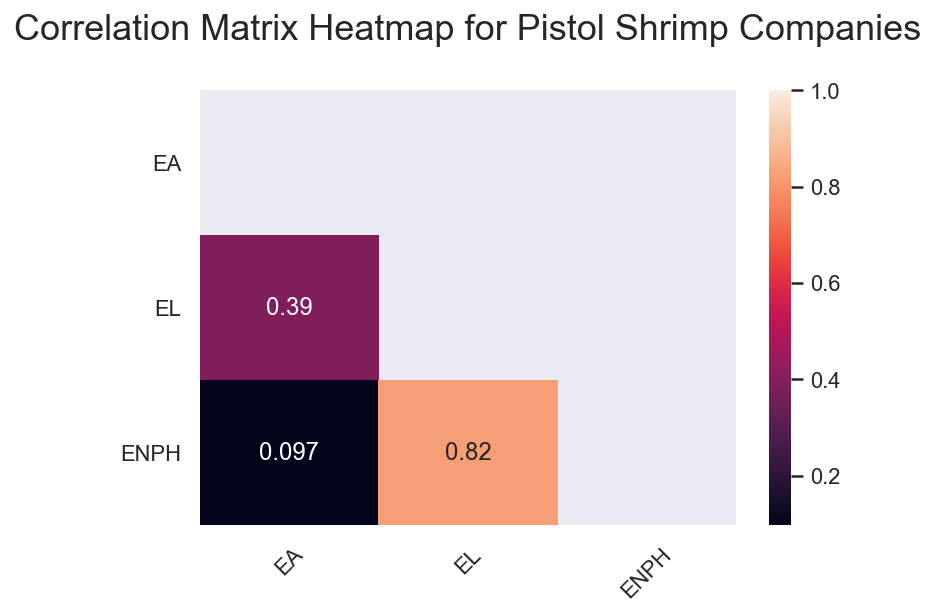

In [104]:
sns.set()
sns.heatmap(table.corr(min_periods=12), mask = mask, annot=True)
plt.title("Correlation Matrix Heatmap for Pistol Shrimp Companies\n", size = 18)
plt.yticks(rotation=0) 
plt.xticks(rotation=45) 
plt.show()

# There's a decent amount of non-correlation such that we have a diversified portfolio across a range of
# industries. 

## Monte Carlo Simulation : 
 - Simulated return % for 30 days
 - Simulated return % for 1-year 
 - Simulated stock price for each of our 5 stocks, based on their individual volatility and return as above

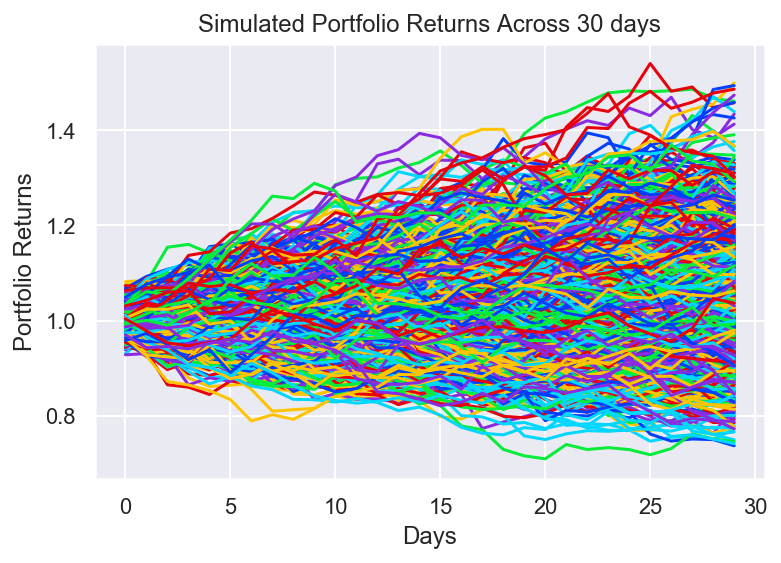

In [51]:
# Monty carlo for 30 days
#load data
style.use('seaborn-bright')
stock_price = table
stock_price = stock_price.values

# set monte carlo parameters
mc_rep = 1000
train_days = 30

#calculate stock returns
nrows = len(stock_price)
stock_returns = stock_price[1:nrows,:] / stock_price[0:nrows-1,:] - 1

#set Portfolio weights
portf_WT = np.array([1/3, 1/3, 1/3])

#Calculate covariance matrix and mean of the stock returns
cov = cov_matrix
miu = np.mean(stock_returns, axis=0)
Miu = np.full((train_days,3),miu)
Miu = np.transpose(Miu)

#Monte-Carlo to simulate the portfolio returns in 30 days
# initial matrix
portf_returns_30 = np.full((train_days,mc_rep),0.)

np.random.seed(100)
for i in range(0,mc_rep):
    Z = np.random.normal(size=3*train_days)
    Z = Z.reshape((3,train_days))
    L = np.linalg.cholesky(cov)
    daily_returns = Miu + np.inner(L,np.transpose(Z))
    portf_Returns_30=np.cumprod(np.inner(portf_WT,np.transpose(daily_returns)) + 1)
    portf_returns_30[:,i] = portf_Returns_30
    

#Visualizing the result    
plt.plot(portf_returns_30)
plt.ylabel('Portfolio Returns')
plt.xlabel('Days')
plt.title('Simulated Portfolio Returns Across 30 days')
plt.show()

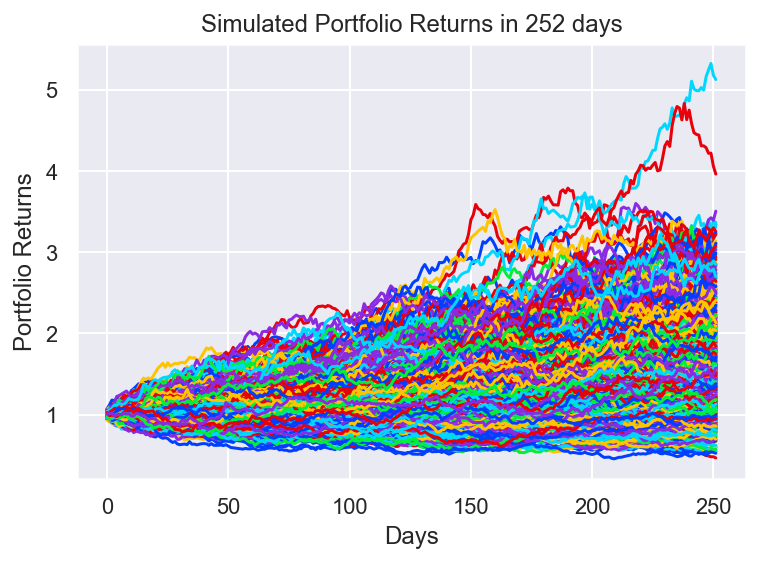

In [52]:
# Monty carlo for 252 days
#load data
style.use('seaborn-bright')
stock_price = table
stock_price = stock_price.values

# set monte carlo parameters
mc_rep = 1000
train_days = 252

#calculate stock returns
nrows = len(stock_price)
stock_returns = stock_price[1:nrows,:] / stock_price[0:nrows-1,:] - 1

#set Portfolio weights
portf_WT = np.array([1/3, 1/3, 1/3])

#Calculate covariance matrix and mean of the stock returns
cov = cov_matrix
miu = np.mean(stock_returns, axis=0)
Miu = np.full((train_days,3),miu)
Miu = np.transpose(Miu)

#Monte-Carlo to simulate the portfolio returns in 30 days
# initial matrix
portf_returns_252_m = np.full((train_days,mc_rep),0.)

np.random.seed(100)
for i in range(0,mc_rep):
    Z = np.random.normal(size=3*train_days)
    Z = Z.reshape((3,train_days))
    L = np.linalg.cholesky(cov)
    daily_returns = Miu + np.inner(L,np.transpose(Z))
    portf_Returns_252 = np.cumprod(np.inner(portf_WT,np.transpose(daily_returns)) + 1)
    portf_returns_252_m[:,i] = portf_Returns_252
    

#Visualizing the result    
plt.plot(portf_returns_252_m)
plt.ylabel('Portfolio Returns')
plt.xlabel('Days')
plt.title('Simulated Portfolio Returns in 252 days')
plt.show()


In [37]:
#the same as previously calculated mean return just repeated as needed for simulation computation --see next cell
# Miu

In [53]:
print("Mean simulated daily return % across 1-year: ")
mean_returns

Mean simulated daily return % across 1-year: 


EA      0.000625
EL      0.000781
ENPH    0.003672
dtype: float64

## Individual Stock Returns and Volatility
Based on the output of the Portfolio Optimization with Individual Stocks:

Individual Stock Returns and Volatility

- EA : annuaised return 0.16 , annualised volatility: 0.33
- EL : annuaised return 0.2 , annualised volatility: 0.27
- ENPH : annuaised return 0.93 , annualised volatility: 0.88

In [55]:
# download our individual price data into DataFrame
start = datetime(2016, 1, 3)
enph = data.DataReader('ENPH', 'yahoo', start=start)
el = data.DataReader('EL', 'yahoo', start=start)
ea = data.DataReader('EA', 'yahoo', start=start)

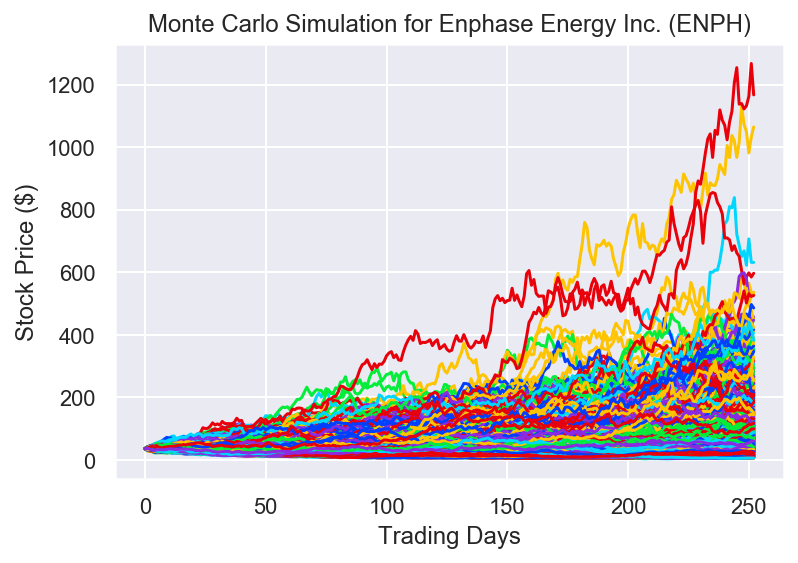

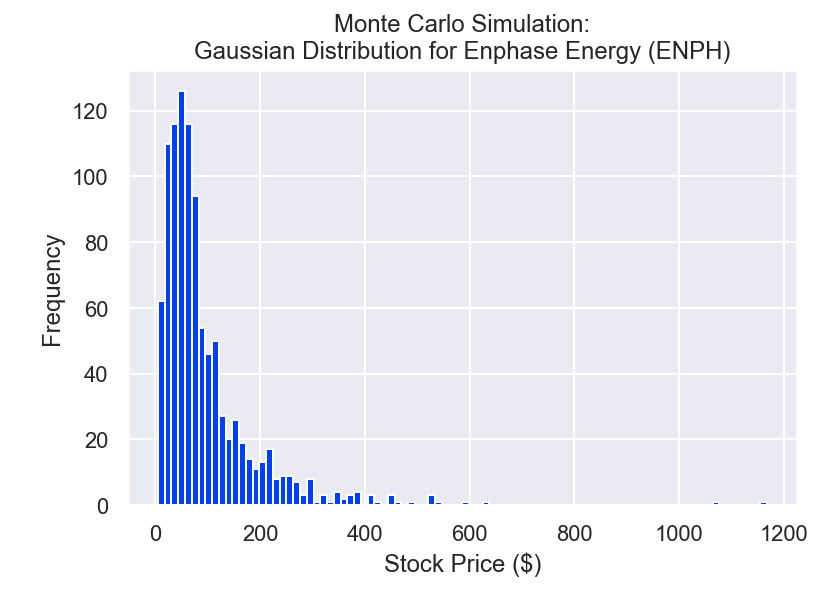

In [64]:
#set up empty list to hold our ending values for each simulated price series
from matplotlib import style
style.use('seaborn-bright')

ENPH_result = []

#Define Variables
S = enph['Adj Close'][-1] #starting stock price (i.e. last available real stock price)
T = 252 #Number of trading days
mu = 0.93 # Return, based on the individual stock return as calculated above
vol = 0.88 # Volatility, based on the individual stock volatility as calculated above

#choose number of runs to simulate - I have chosen 10,000
for i in range(1000):
    #create list of daily returns using random normal distribution
    daily_returns=np.random.normal(mu/T,vol/math.sqrt(T),T)+1
    
    #set starting price and create price series generated by above random daily returns
    price_list = [S]
    
    for x in daily_returns:
        price_list.append(price_list[-1]*x)

    #plot data from each individual run which we will plot at the end
    plt.plot(price_list)
    
    #append the ending value of each simulated run to the empty list we created at the beginning
    ENPH_result.append(price_list[-1])

#show the plot of multiple price series created above
plt.title("Monte Carlo Simulation for Enphase Energy Inc. (ENPH)")
plt.xlabel("Trading Days")
plt.ylabel("Stock Price ($)")
plt.show()

#create histogram of ending stock values for our mutliple simulations
plt.title("Monte Carlo Simulation:\nGaussian Distribution for Enphase Energy (ENPH)")
plt.ylabel("\nFrequency")
plt.xlabel("Stock Price ($)")
plt.hist(ENPH_result,bins=90)
plt.show()

In [65]:
# Confidence Interval
from scipy.stats import sem, t
from scipy import mean
confidence = 0.95

ENPH_mean_yr_val = np.mean(ENPH_result)
ENPH_max_yr_val = np.max(ENPH_result)
ENPH_min_yr_val = np.min(ENPH_result)
ENPH_percentile_5 = np.percentile(ENPH_result,5)
ENPH_median = np.percentile(ENPH_result, 50)
ENPH_percentile_95 = np.percentile(ENPH_result, 95)
ENPH_std_yr_val = np.std(ENPH_result)


n = len(ENPH_result)
std_err = sem(ENPH_result)
h = std_err * t.ppf((1 + confidence) / 2, n - 1)

start = ENPH_mean_yr_val - h
end = ENPH_mean_yr_val + h

print('Mean ending value of the simulated 1-year ENPH stock price: ${:.2f}'.format(ENPH_mean_yr_val))
print ("ENPH 95% confidence range: ${:.2f}".format(start), "- ${:.2f}".format(end))
print('Standard deviation: ${:.2f}'.format(ENPH_std_yr_val))

print("\nThe maximum yearly simulated ENPH return is ${:.2f}".format(ENPH_max_yr_val))
print("The minimum yearly ENPH return is ${:.2f}".format(ENPH_min_yr_val))

print("\n5th percentile: ${:.2f}".format(ENPH_percentile_5))
print("Median: ${:.2f}".format(ENPH_median))
print("95th percentile: ${:.2f}".format(ENPH_percentile_95))

Mean ending value of the simulated 1-year ENPH stock price: $95.14
ENPH 95% confidence range: $89.06 - $101.21
Standard deviation: $97.84

The maximum yearly simulated ENPH return is $1167.12
The minimum yearly ENPH return is $4.69

5th percentile: $16.03
Median: $65.98
95th percentile: $264.11


The 95% percent confidence interval for simulated stock price ranges from \\$89.06 to $101.21. Our calculated mean falls within the range of our interval. After performing 1000 simulations, we are 95% confident that the interval will capture the true mean of the stock price.

This is the widest band of CI that we will see with our stocks. Perhaps, there is no coincidence that ENPH is our most volatile stock. 

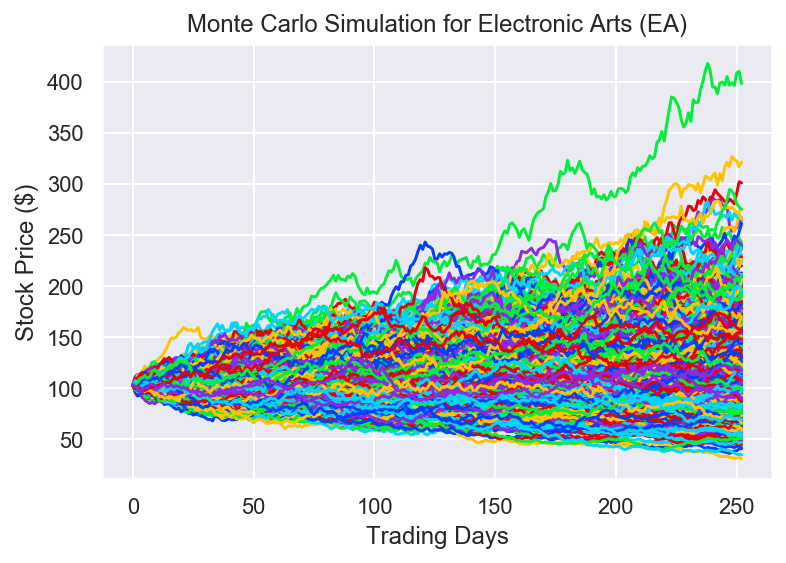

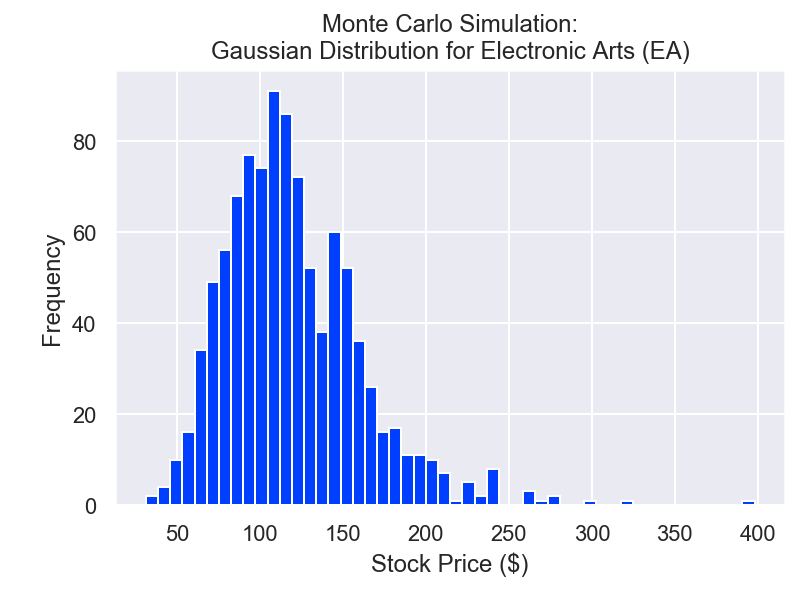

In [59]:
# EA
# EA : annuaised return 0.16 , annualised volatility: 0.33

EA_result = []

#Define Variables
S = ea['Adj Close'][-1] #starting stock price (i.e. last available real stock price)
T = 252 # Number of trading days
mu = 0.16 # Return, based on the individual stock return as calculated above
vol = 0.33 # Volatility, based on the individual stock volatility as calculated above

#choose number of runs to simulate - I have chosen 10,000
for i in range(1000):
    #create list of daily returns using random normal distribution
    daily_returns=np.random.normal(mu/T,vol/math.sqrt(T),T)+1
    
    #set starting price and create price series generated by above random daily returns
    price_list = [S]
    
    for x in daily_returns:
        price_list.append(price_list[-1]*x)

    #plot data from each individual run which we will plot at the end
    plt.plot(price_list)
    
    #append the ending value of each simulated run to the empty list we created at the beginning
    EA_result.append(price_list[-1])

#show the plot of multiple price series created above
plt.title("Monte Carlo Simulation for Electronic Arts (EA)")
plt.xlabel("Trading Days")
plt.ylabel("Stock Price ($)")
plt.show()

#create histogram of ending stock values for our mutliple simulations
plt.title("Monte Carlo Simulation:\nGaussian Distribution for Electronic Arts (EA)")
plt.ylabel("\nFrequency")
plt.xlabel("Stock Price ($)")
plt.hist(EA_result,bins=50)
plt.show()

In [60]:
EA_mean_yr_val = np.mean(EA_result)
EA_max_yr_val = np.max(EA_result)
EA_min_yr_val = np.min(EA_result)
EA_percentile_5 = np.percentile(EA_result,5)
EA_median = np.percentile(EA_result, 50)
EA_percentile_95 = np.percentile(EA_result, 95)
EA_std_yr_val = np.std(EA_result)


n = len(EA_result)
std_err = sem(EA_result)
h = std_err * t.ppf((1 + confidence) / 2, n - 1)

start = EA_mean_yr_val - h
end = EA_mean_yr_val + h

print('Mean ending value of the simulated 1-year EA stock price: ${:.2f}'.format(EA_mean_yr_val))
print ("EA 95% confidence range: ${:.2f}".format(start), "- ${:.2f}".format(end))
print('Standard deviation: ${:.2f}'.format(EA_std_yr_val))

print("\nThe maximum yearly simulated EA return is ${:.2f}".format(EA_max_yr_val))
print("The minimum yearly EA return is ${:.2f}".format(EA_min_yr_val))

print("\n5th percentile: ${:.2f}".format(EA_percentile_5))
print("Median: ${:.2f}".format(EA_median))
print("95th percentile: ${:.2f}".format(EA_percentile_95))

Mean ending value of the simulated 1-year EA stock price: $119.42
EA 95% confidence range: $116.86 - $121.99
Standard deviation: $41.35

The maximum yearly simulated EA return is $398.09
The minimum yearly EA return is $31.00

5th percentile: $65.25
Median: $113.36
95th percentile: $194.04


The 95% percent confidence interval ranges from \\$116.86 to $121.99. Our calculated mean falls within the range of our interval. After performing 1000 simulations, we are 95% confident that the interval will capture the true mean of the stock price.

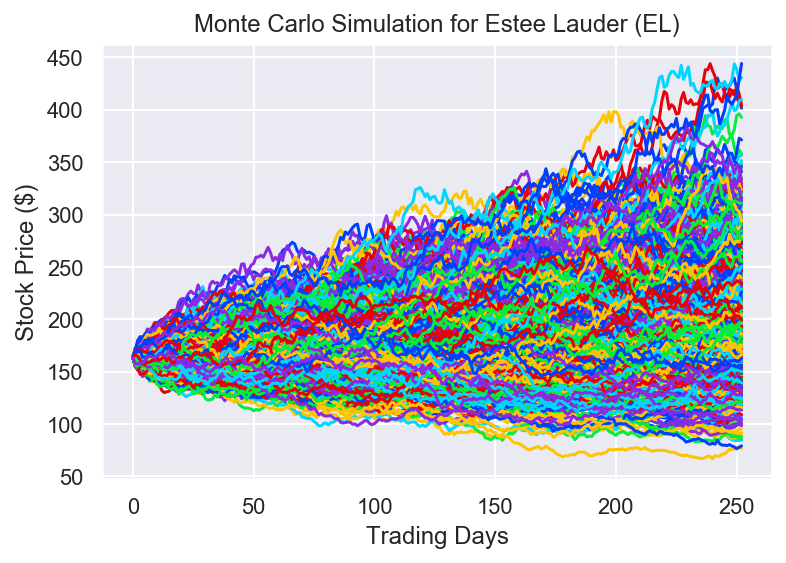

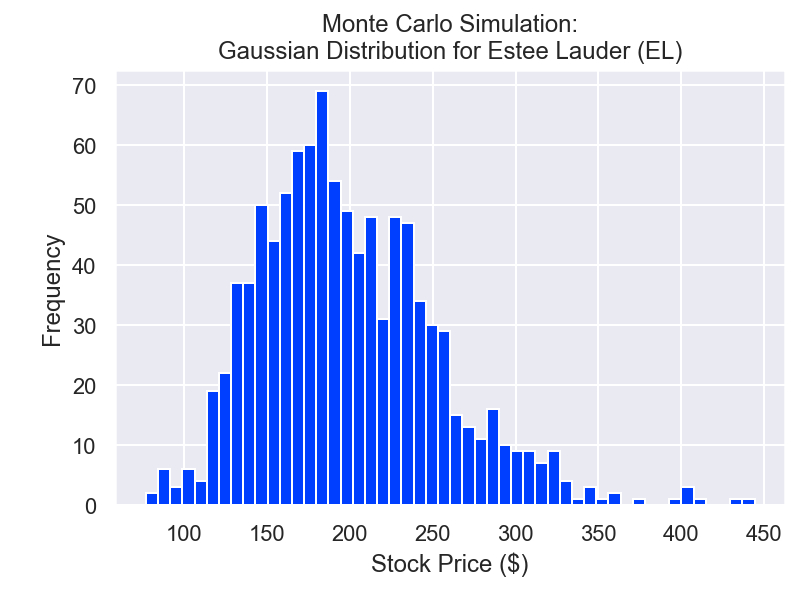

In [61]:
# EL 
# EL : annuaised return 0.2 , annualised volatility: 0.27

EL_result = []

#Define Variables
S = el['Adj Close'][-1] #starting stock price (i.e. last available real stock price)
T = 252 # Number of trading days
mu = 0.2 # Return, based on the individual stock return as calculated above
vol = 0.27 # Volatility, based on the individual stock volatility as calculated above

#choose number of runs to simulate - I have chosen 10,000
for i in range(1000):
    #create list of daily returns using random normal distribution
    daily_returns=np.random.normal(mu/T,vol/math.sqrt(T),T)+1
    
    #set starting price and create price series generated by above random daily returns
    price_list = [S]
    
    for x in daily_returns:
        price_list.append(price_list[-1]*x)

    #plot data from each individual run which we will plot at the end
    plt.plot(price_list)
    
    #append the ending value of each simulated run to the empty list we created at the beginning
    EL_result.append(price_list[-1])

#show the plot of multiple price series created above
plt.title("Monte Carlo Simulation for Estee Lauder (EL)")
plt.xlabel("Trading Days")
plt.ylabel("Stock Price ($)")
plt.show()

#create histogram of ending stock values for our mutliple simulations
plt.title("Monte Carlo Simulation:\nGaussian Distribution for Estee Lauder (EL)")
plt.ylabel("\nFrequency")
plt.xlabel("Stock Price ($)")
plt.hist(EL_result,bins=50)
plt.show()

In [63]:
EL_mean_yr_val = np.mean(EL_result)
EL_max_yr_val = np.max(EL_result)
EL_min_yr_val = np.min(EL_result)
EL_percentile_5 = np.percentile(EL_result,5)
EL_median = np.percentile(EL_result, 50)
EL_percentile_95 = np.percentile(EL_result, 95)
EL_std_yr_val = np.std(EL_result)

n = len(EL_result)
std_err = sem(EL_result)
h = std_err * t.ppf((1 + confidence) / 2, n - 1)

start = EL_mean_yr_val - h
end = EL_mean_yr_val + h

print('Mean ending value of the simulated 1-year EL stock price: ${:.2f}'.format(EL_mean_yr_val))
print ("EL 95% confidence range: ${:.2f}".format(start), "- ${:.2f}".format(end))
print('Standard deviation: ${:.2f}'.format(EL_std_yr_val))

print("\nThe maximum yearly simulated EL stock return is ${:.2f}".format(EL_max_yr_val))
print("The minimum yearly EL return is ${:.2f}".format(EL_min_yr_val))

print("\n5th percentile: ${:.2f}".format(EL_percentile_5))
print("Median: ${:.2f}".format(EL_median))
print("95th percentile: ${:.2f}".format(EL_percentile_95))

Mean ending value of the simulated 1-year EL stock price: $199.30
EL 95% confidence range: $195.92 - $202.68
Standard deviation: $54.42

The maximum yearly simulated EL stock return is $444.20
The minimum yearly EL return is $76.89

5th percentile: $123.44
Median: $191.17
95th percentile: $298.01


The 95% percent confidence interval ranges from \\$195.10 to $202.68. Our calculated mean falls within the range of our interval. After performing 1000 simulations, we are 95% confident that the interval will capture the true mean of the stock price.